In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = "/Users/jishnu/codespace/AMATEUR_RADIO/Code_nanovna/RG58_cable/"
file_name_load = "one_end_load.s1p"
file_name_open = "one_end_open.s1p"
file_name_short = "one_end_short.s1p"
file_name_2port = "insertion_loss_no_ferrite.s1p"
file_name_2port_ferrite = "insertion_loss_ferrite_3.s1p"

In [3]:
freq = np.loadtxt(PATH+file_name_load, usecols=0)/1e6

S11_c_load = np.loadtxt(PATH+file_name_load, usecols=1) + np.loadtxt(PATH+file_name_load, usecols=2)*1j
S11_c_open = np.loadtxt(PATH+file_name_open, usecols=1) + np.loadtxt(PATH+file_name_open, usecols=2)*1j
S11_c_short = np.loadtxt(PATH+file_name_short, usecols=1) + np.loadtxt(PATH+file_name_short, usecols=2)*1j

S11_c_2p = np.loadtxt(PATH+file_name_2port, usecols=1) + np.loadtxt(PATH+file_name_2port, usecols=2)*1j
S21_c_2p = np.loadtxt(PATH+file_name_2port, usecols=3) + np.loadtxt(PATH+file_name_2port, usecols=4)*1j
S21_c_2p_ferrite = np.loadtxt(PATH+file_name_2port_ferrite, usecols=3) + np.loadtxt(PATH+file_name_2port_ferrite, usecols=4)*1j

ops = (S11_c_open+S11_c_short)/2
oms = (S11_c_open-S11_c_short)/2

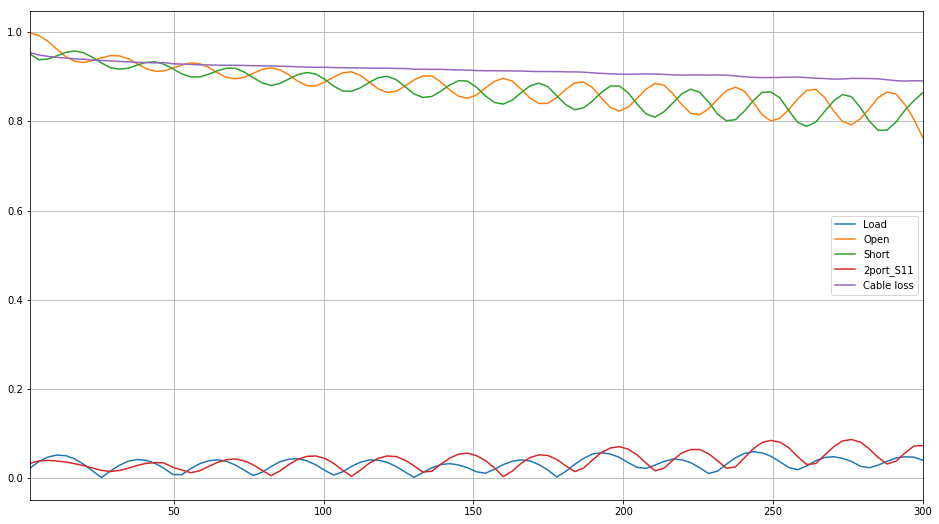

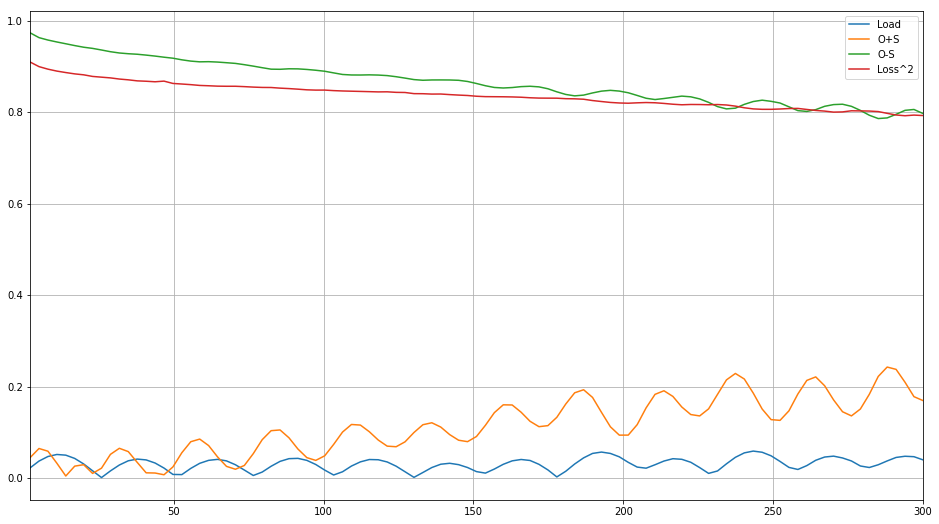

In [4]:
plt.figure(1, figsize=(16,9))
plt.plot(freq, np.abs(S11_c_load), label="Load")
plt.plot(freq, np.abs(S11_c_open), label="Open")
plt.plot(freq, np.abs(S11_c_short), label="Short")
plt.plot(freq, np.abs(S11_c_2p), label="2port_S11")
plt.plot(freq, np.abs(S21_c_2p), label="Cable loss")
plt.legend(loc='best')
plt.xlim([min(freq), max(freq)])
plt.grid()

plt.figure(2, figsize=(16,9))
plt.plot(freq, np.abs(S11_c_load), label="Load")
plt.plot(freq, np.abs(ops), label="O+S")
plt.plot(freq, np.abs(oms), label="O-S")
plt.plot(freq, np.abs(S21_c_2p)**2, label="Loss^2")
plt.legend(loc='best')
plt.xlim([min(freq), max(freq)])
plt.grid()

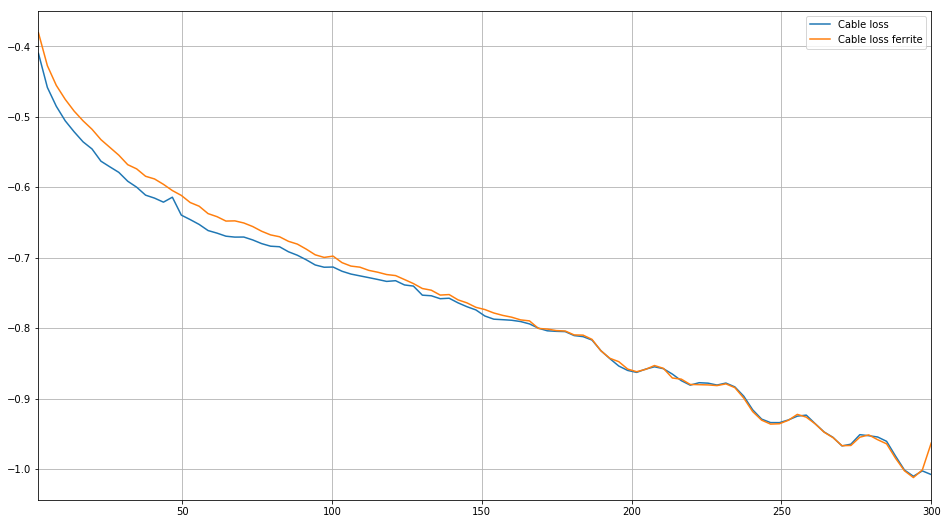

In [5]:
loss_pfit_c = np.polyfit(freq, 20*np.log10(np.abs(S21_c_2p)), 1)
loss_pfit = np.polyval(loss_pfit_c, freq)

# print (loss_pfit_c)

plt.figure(3, figsize=(16,9))
# plt.plot(freq, np.abs(S21_c_2p), label="Cable loss")
plt.plot(freq, 20*np.log10(np.abs(S21_c_2p)), label="Cable loss")
plt.plot(freq, 20*np.log10(np.abs(S21_c_2p_ferrite)), label="Cable loss ferrite")
# plt.plot(freq, loss_pfit, label="Cable loss pfit")
# plt.plot(freq, 10*np.log10(np.abs(oms)), label="OMS")
plt.legend(loc='best')
plt.xlim([min(freq), max(freq)])
plt.grid()